# OpenCV Template

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Config</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Path" data-toc-modified-id="Path-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Path</a></span></li></ul></li><li><span><a href="#imread" data-toc-modified-id="imread-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>imread</a></span></li><li><span><a href="#Resize" data-toc-modified-id="Resize-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resize</a></span><ul class="toc-item"><li><span><a href="#Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ" data-toc-modified-id="Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ</a></span></li></ul></li></ul></div>

## Config

### Import

In [53]:
import os,pathlib
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
print("cv2.__version__ : {}".format(cv2.__version__))

cv2.__version__ : 4.0.0


### Path

In [21]:
HOME_Path = pathlib.Path(os.getcwd()).parents[0]
img_Path = HOME_Path / "img"
print("path name | exist | path\n" + 
      "========================")
print("HOME_Path | {:5} | {}".format(HOME_Path.exists(), str(HOME_Path)))
print("img_Path  | {:5} | {}".format(img_Path.exists(),  str(img_Path)))

path name | exist | path
HOME_Path |     1 | /Users/hiroaki.sugisaki/workdir/git/OpenCV-Template
img_Path  |     1 | /Users/hiroaki.sugisaki/workdir/git/OpenCV-Template/img


## imread

im.shape : (576, 768, 3)
-------------------------------
| Height  | Width   | Channel |
|     576 |     768 |       3 |
-------------------------------


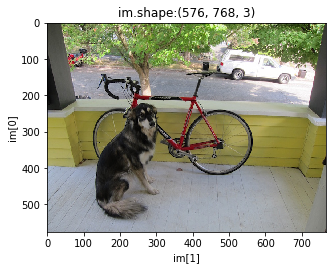

In [47]:
_filepath = str(img_Path / "dog.jpg")
im = cv2.imread(filename=_filepath)
im = cv2.cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
_h, _w, _c = im.shape
print("im.shape : {}".format(im.shape))
print("-------------------------------\n" +
      "| Height  | Width   | Channel |\n" +
      "| {:7} | {:7} | {:7} |\n".format(_h, _w, _c) +
      "-------------------------------")

########################################
fig = plt.figure(figsize=(5,5))
nrows, ncols, idx = 1, 1, 0
idx += 1
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(im)
ax.set_title(label="im.shape:{}".format(im.shape))
ax.set_xlabel(xlabel="im[1]")
ax.set_ylabel(ylabel="im[0]")
plt.show()

## Resize

### Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ

- https://github.com/ayooshkathuria/pytorch-yolo-v3/blob/master/preprocess.py#L15-L27

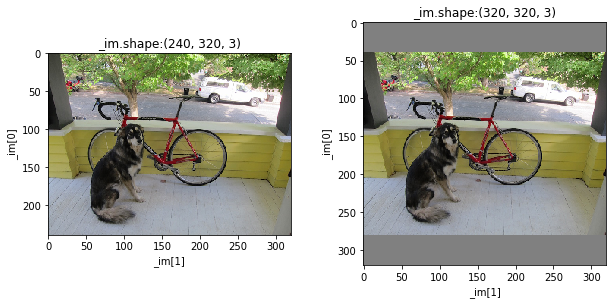

In [62]:
################################################################################
########################################
# Height,Widthの比率を変えずに指定した枠内に収めるようにリサイズ
_filepath = str(img_Path / "dog.jpg")
im = cv2.imread(filename=_filepath)
im = cv2.cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im_h, im_w = im.shape[0], im.shape[1]
w, h = (320, 320)

new_w = int(im_w * min(w/im_w, h/im_h))
new_h = int(im_h * min(w/im_w, h/im_h))

resized_image = cv2.resize(im, (new_w,new_h), interpolation = cv2.INTER_CUBIC)

########################################
# 枠内の空いたスペースをRGB=(128,128,128)で埋める
canvas = np.full((w, h, 3), 128)
canvas[(h-new_h)//2:(h-new_h)//2 + new_h,(w-new_w)//2:(w-new_w)//2 + new_w,  :] = resized_image

################################################################################
# Plot
fig = plt.figure(figsize=(10,5))
nrows, ncols, idx = 1, 2, 0
####################
idx += 1
_im = resized_image
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im)
ax.set_title(label="_im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="_im[1]")
ax.set_ylabel(ylabel="_im[0]")
####################
idx += 1
_im = canvas
ax = fig.add_subplot(nrows, ncols, idx)
ax.imshow(_im)
ax.set_title(label="_im.shape:{}".format(_im.shape))
ax.set_xlabel(xlabel="_im[1]")
ax.set_ylabel(ylabel="_im[0]")
####################
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()